In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import tree
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)
    


M_objects = uci_bc_data.loc[uci_bc_data['diagnosis'] == 'M']
B_objects = uci_bc_data.loc[uci_bc_data['diagnosis'] == 'B']
print(M_objects)

#y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
#X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()
#print(f"Number class B: {y.tolist().count(0)}, Number class M: {y.tolist().count(1)}")
#correlations = uci_bc_data.corr()
#sn.heatmap(correlations)
#plt.figure(figsize=(30,30))
#plt.show()# Start writing code here...

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
563         M        20.92         25.09          143.00     1347.0   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              

In [ ]:



IMBALANCES = [ 0.6, 0.65, 0.7, 0.75, 0.8]

def generate_X(X_objects,diagnosis, factor=0.95):

    rand_X1 = X_objects.iloc[np.random.randint(0,len(X_objects.values.tolist()))].drop("diagnosis")
    rand_X2 = X_objects.iloc[np.random.randint(0,len(X_objects.values.tolist()))].drop("diagnosis")
    new_X = rand_X1*factor + rand_X2*(1-factor)
    new_X["diagnosis"] = diagnosis
    return new_X

def set_imbalance(data, imbalance_p, diagnosis):
    X_objects = data.loc[data['diagnosis'] == diagnosis]
    N = data.shape[0]
    N_new_patients = int(B_objects.shape[0]/(1-imbalance_p) - B_objects.shape[0] - M_objects.shape[0])
    for i in range(N_new_patients):
        new_patient = generate_X(X_objects,diagnosis)
        data.loc[N+i] = new_patient
    return data


def split_data(data, train_fraction=0.8):
    M_objects = data[data["diagnosis"] == "M"]
    B_objects = data[data["diagnosis"] == "B"]
    X_M = M_objects.drop("diagnosis", axis=1).to_numpy()
    X_B = B_objects.drop("diagnosis", axis=1).to_numpy()
    y_M = M_objects.diagnosis.map({"B": 0, "M": 1}).to_numpy()
    y_B = B_objects.diagnosis.map({"B": 0, "M": 1}).to_numpy()
    N_test = len(data.values.tolist())*(1-train_fraction)
    N_test = int(N_test/2)


    X_test = X_M[:N_test].tolist() + X_B[:N_test].tolist()
    X_train = X_M[N_test:].tolist() + X_B[N_test:].tolist()
    y_test = y_M[:N_test].tolist() + y_B[:N_test].tolist()
    y_train = y_M[N_test:].tolist() + y_B[N_test:].tolist()
    
    return X_train, X_test, y_train, y_test

"""
imbalanced_data = set_imbalance(uci_bc_data, 0.75, 'M')
X_train, X_test, y_train, y_test = split_data(imbalanced_data)
print(len(X_train))
print(len(X_test))
"""



"\nimbalanced_data = set_imbalance(uci_bc_data, 0.75, 'M')\nX_train, X_test, y_train, y_test = split_data(imbalanced_data)\nprint(len(X_train))\nprint(len(X_test))\n"

### No adjustments

Imbalance : 60.0%
Precision : 0.9162332545311269
Recall : 0.9400749063670412
F1 : 0.9279034506619451
Accuracy : 0.9269662921348315
___________________________________
Imbalance : 65.0%
Precision : 0.9327449406481071
Recall : 0.9651741293532338
F1 : 0.9486631916130662
Accuracy : 0.9477611940298507
___________________________________
Imbalance : 70.0%
Precision : 0.9186223465575506
Recall : 0.9778911564625851
F1 : 0.9473075668763894
Accuracy : 0.945578231292517
___________________________________
Imbalance : 75.0%
Precision : 0.9006263706426371
Recall : 0.9728132387706855
F1 : 0.9352920640656489
Accuracy : 0.9326241134751774
___________________________________
Imbalance : 80.0%
Precision : 0.5302631578947369
Recall : 1.0
F1 : 0.6930352536543422
Accuracy : 0.5302631578947369
___________________________________


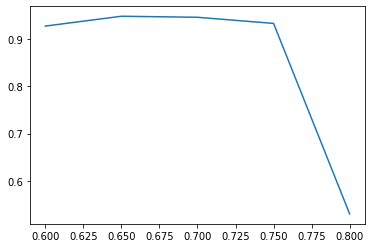

In [ ]:
#No adjustments
from sklearn.neighbors import KNeighborsClassifier



Niterations = 3
accuracies = []
for i in range(len(IMBALANCES)):
    accuracy = []
    precision = []
    recall = []
    f1 = []
    imbalance = IMBALANCES[i]
    imbalanced_data = set_imbalance(uci_bc_data, imbalance, 'M')
    X_train, X_test, y_train, y_test = split_data(imbalanced_data)
    for j in range(Niterations):

        CART = tree.DecisionTreeRegressor()
        predictions = CART.fit(X_train, y_train).predict(X_test)
        
        accuracy.append(accuracy_score(y_test, predictions))
        precision.append(precision_score(y_test,predictions))
        recall.append(recall_score(y_test,predictions))
        f1.append(f1_score(y_test,predictions))
    accuracies.append(np.mean(accuracy))
    print(f'Imbalance : {imbalance*100}%')
    print(f'Precision : {np.mean(precision)}')
    print(f'Recall : {np.mean(recall)}')
    print(f'F1 : {np.mean(f1)}')
    print(f'Accuracy : {np.mean(accuracy)}')
    print('___________________________________')

plt.plot(IMBALANCES,accuracies)



### Observation weights

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


Niterations = 3
accuracies = []
for i in range(len(IMBALANCES)):
    accuracy = []
    precision = []
    recall = []
    f1 = []
    imbalance = IMBALANCES[i]
    imbalanced_data = set_imbalance(uci_bc_data, imbalance, 'M')
    X_train, X_test, y_train, y_test = split_data(imbalanced_data)
    for j in range(Niterations):
        CART = tree.DecisionTreeClassifier(class_weight = 'balanced')
        predictions = CART.fit(X_train, y_train,).predict(X_test)
        accuracy.append(accuracy_score(y_test, predictions))
        precision.append(precision_score(y_test,predictions))
        recall.append(recall_score(y_test,predictions))
        f1.append(f1_score(y_test,predictions))
    accuracies.append(np.mean(accuracy))

    print(f'Imbalance : {imbalance*100}%')
    print(f'Precision : {np.mean(precision)}')
    print(f'Recall : {np.mean(recall)}')
    print(f'F1 : {np.mean(f1)}')
    print(f'Accuracy : {np.mean(accuracy)}')
    print('___________________________________')

plt.plot(IMBALANCES,accuracies)


KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Up sampling

In [ ]:
#Up sampling
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

accuracy = []
precision = []
recall = []
f1 = []
fpr = 0
tpr = 0
Niterations = 5
imbalanced_data = set_imbalance(uci_bc_data, 0.5, 'M')
X_train, X_test, y_train, y_test = split_data(imbalanced_data)
for j in range(Niterations):
     CART = tree.DecisionTreeRegressor()
        predictions = CART.fit(X_train, y_train).predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test,predictions))
    recall.append(recall_score(y_test,predictions))
    f1.append(f1_score(y_test,predictions))

print(f'No imbalance')
print(f'Precision : {sum(precision)/len(precision)}')
print(f'Recall : {sum(recall)/len(recall)}')
print(f'F1 : {sum(f1)/len(f1)}')
print(f'Accuracy : {sum(accuracy)/len(accuracy)}')
print('___________________________________')

#print(predictions)


#ns_auc = roc_auc_score(testy, ns_probs)



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f98e27f7-6444-4cf3-8fec-73bc47540f9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>